In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("split/train.csv")

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2793718,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040.0
1,id3485529,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827.0
2,id1816614,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614.0
3,id1050851,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,867.0
4,id0140657,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,4967.0


In [ ]:
df.shape

(9198, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9198 entries, 0 to 9197
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  9198 non-null   object 
 1   vendor_id           9198 non-null   int64  
 2   pickup_datetime     9198 non-null   object 
 3   passenger_count     9198 non-null   int64  
 4   pickup_longitude    9198 non-null   float64
 5   pickup_latitude     9198 non-null   float64
 6   dropoff_longitude   9198 non-null   float64
 7   dropoff_latitude    9197 non-null   float64
 8   store_and_fwd_flag  9197 non-null   object 
 9   trip_duration       9197 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 718.7+ KB


In [ ]:
df.duplicated().count()

np.int64(9198)

In [ ]:
df = df.drop(columns=["id","store_and_fwd_flag"],axis=True)

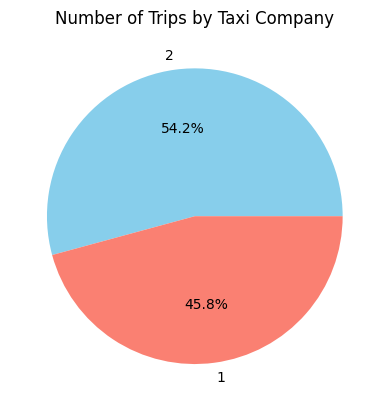

In [ ]:
plt.pie(df["vendor_id"].value_counts(), labels=df["vendor_id"].value_counts().keys(), autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Number of Trips by Taxi Company')
plt.show()

In [ ]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

In [ ]:
df["pickup_year"] = df["pickup_datetime"].dt.year
df["pickup_month"] = df["pickup_datetime"].dt.month
df["pickup_day"] = df["pickup_datetime"].dt.day
df["pickup_hour"] = df["pickup_datetime"].dt.hour + df["pickup_datetime"].dt.minute / 60
df["pickup_dayofweek"] = df["pickup_datetime"].dt.dayofweek

In [ ]:
df = df.drop(columns=["pickup_datetime"])

In [ ]:
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_dayofweek
0,2,1,-73.985611,40.735943,-73.980331,40.760468,1040.0,2016,6,8,7.600000,2
1,2,1,-73.978394,40.764351,-73.991623,40.749859,827.0,2016,4,3,12.966667,6
2,2,5,-73.989059,40.744389,-73.973381,40.748692,614.0,2016,6,5,2.816667,6
3,2,2,-73.990326,40.731136,-73.991264,40.748917,867.0,2016,5,5,17.300000,3
4,1,4,-73.789497,40.646675,-73.987137,40.759232,4967.0,2016,5,12,17.716667,3


In [ ]:
df["pickup_year"].value_counts()

,count
pickup_year,
2016,9198


In [ ]:
df = df.drop(columns=["pickup_year"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9198 entries, 0 to 9197
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vendor_id          9198 non-null   int64  
 1   passenger_count    9198 non-null   int64  
 2   pickup_longitude   9198 non-null   float64
 3   pickup_latitude    9198 non-null   float64
 4   dropoff_longitude  9198 non-null   float64
 5   dropoff_latitude   9197 non-null   float64
 6   trip_duration      9197 non-null   float64
 7   pickup_month       9198 non-null   int32  
 8   pickup_day         9198 non-null   int32  
 9   pickup_hour        9198 non-null   float64
 10  pickup_dayofweek   9198 non-null   int32  
dtypes: float64(6), int32(3), int64(2)
memory usage: 682.8 KB


In [ ]:
import math

def euclidean_distance_row(row):
    # constants
    km_per_degree_lat = 111  # approx. km per degree latitude

    # longitude correction depends on latitude
    avg_lat_rad = math.radians((row['pickup_latitude'] + row['dropoff_latitude']) / 2)
    km_per_degree_lon = 111 * math.cos(avg_lat_rad)

    dx = (row['dropoff_longitude'] - row['pickup_longitude']) * km_per_degree_lon
    dy = (row['dropoff_latitude'] - row['pickup_latitude']) * km_per_degree_lat

    return math.sqrt(dx**2 + dy**2)


In [ ]:
df['euclidean_distance'] = df.apply(euclidean_distance_row, axis=1)

In [ ]:
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_day,pickup_hour,pickup_dayofweek,euclidean_distance
0,2,1,-73.985611,40.735943,-73.980331,40.760468,1040.0,6,8,7.600000,2,2.758206
1,2,1,-73.978394,40.764351,-73.991623,40.749859,827.0,4,3,12.966667,6,1.955744
2,2,5,-73.989059,40.744389,-73.973381,40.748692,614.0,6,5,2.816667,6,1.402309
3,2,2,-73.990326,40.731136,-73.991264,40.748917,867.0,5,5,17.300000,3,1.975191
4,1,4,-73.789497,40.646675,-73.987137,40.759232,4967.0,5,12,17.716667,3,20.801226


In [ ]:
df['trip_duration_log'] = np.log1p(df['trip_duration'])
df.drop('trip_duration', axis=1, inplace=True)

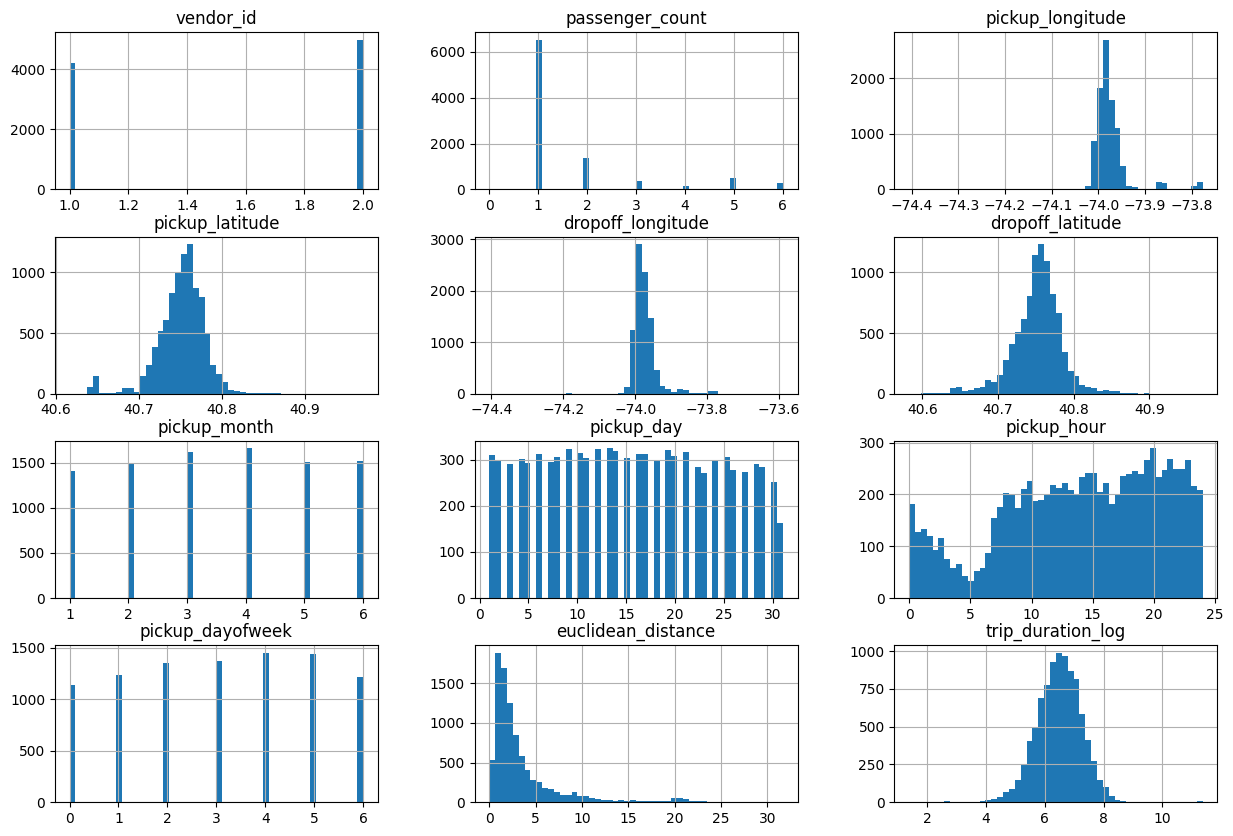

In [ ]:
df.hist(bins=50, figsize=(15,10))
plt.show()

In [ ]:
df["euclidean_distance"].mean()

np.float64(3.500351324827377)

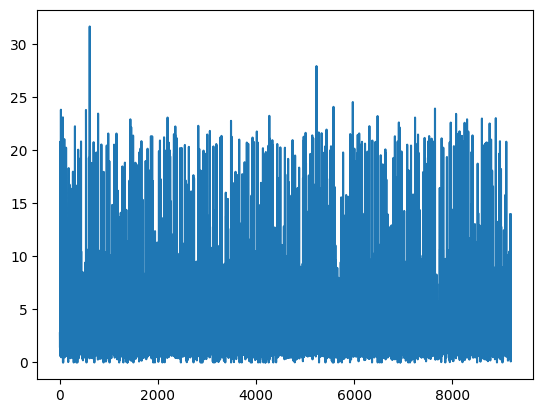

In [ ]:
plt.plot(df["euclidean_distance"])

In [ ]:
df.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'pickup_month', 'pickup_day',
       'pickup_hour', 'pickup_dayofweek', 'euclidean_distance',
       'trip_duration_log'],
      dtype='object')

<Axes: >

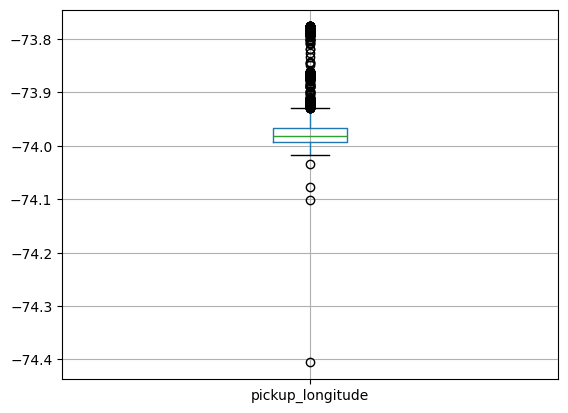

In [ ]:
df.boxplot(column=["pickup_longitude"])

<Axes: xlabel='pickup_longitude', ylabel='pickup_latitude'>

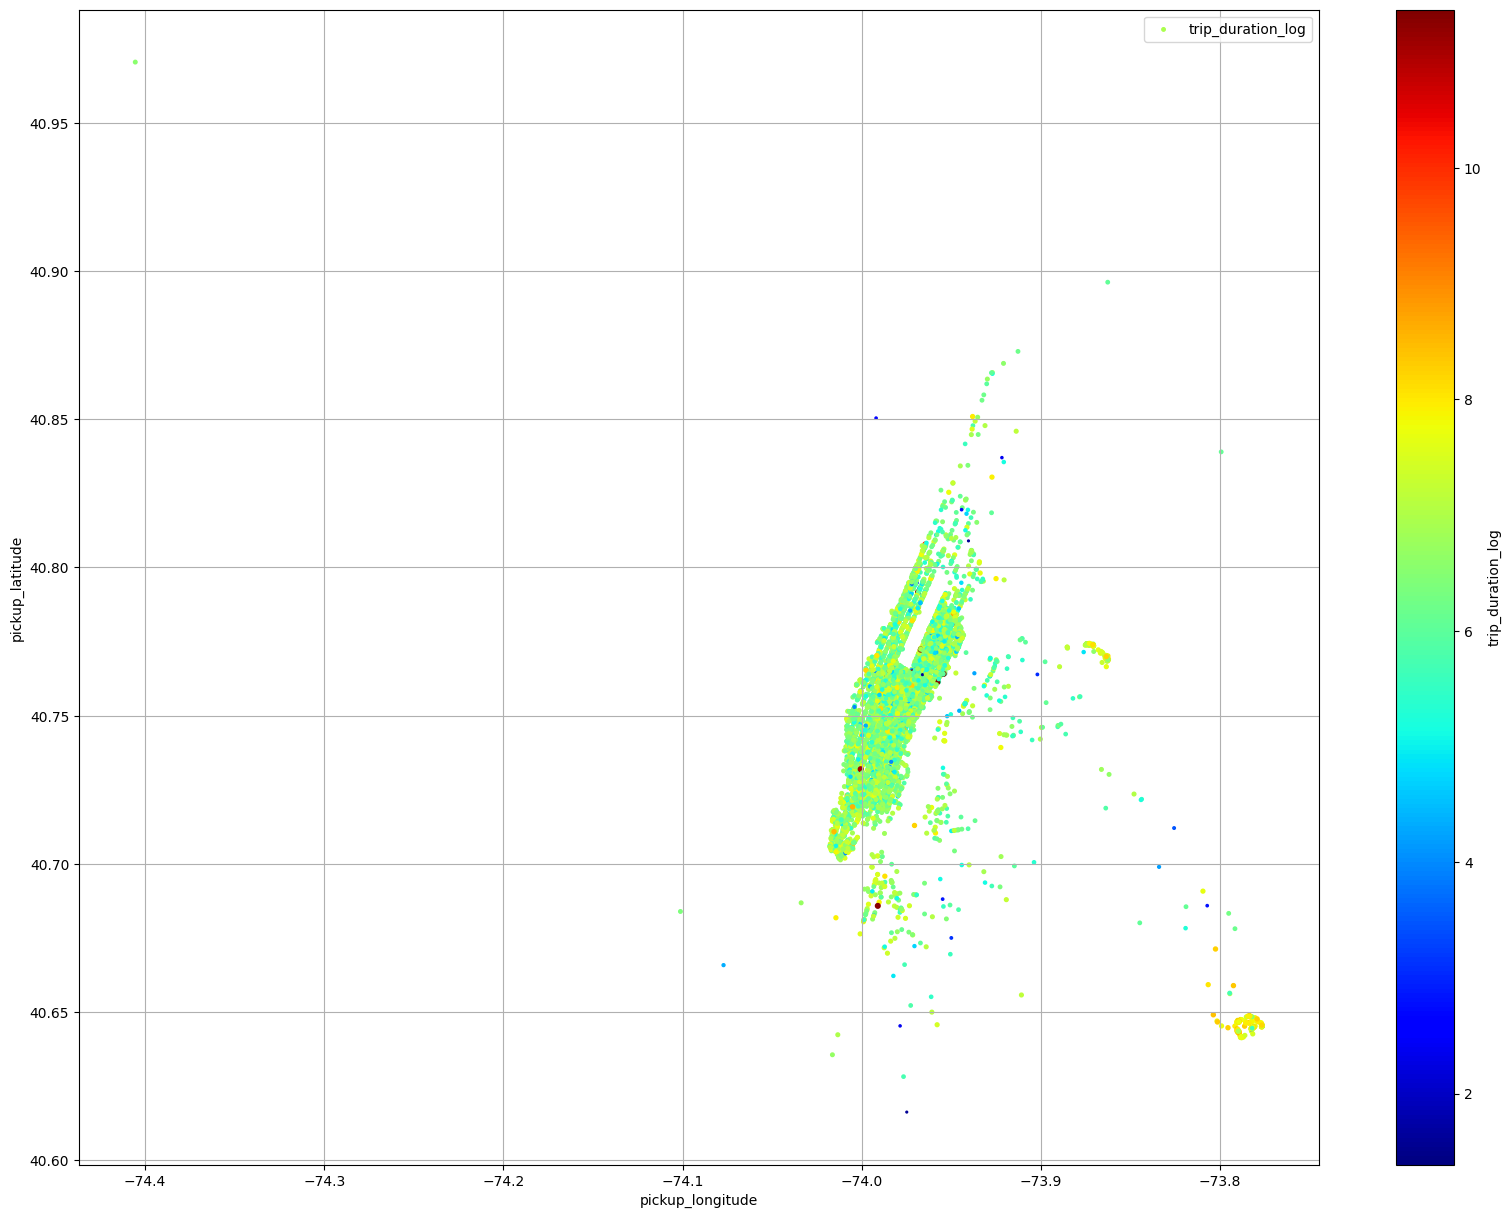

In [ ]:
df.plot(
    kind="scatter",
    x="pickup_longitude",
    y="pickup_latitude",
    grid=True,
    s=df['trip_duration_log'],        # size of points
    label="trip_duration_log",        # corrected spelling
    c="trip_duration_log",            # color
    figsize=(20,15),
    cmap=plt.get_cmap("jet"),
    colorbar=True,
    legend=True,
    sharex=False,
)


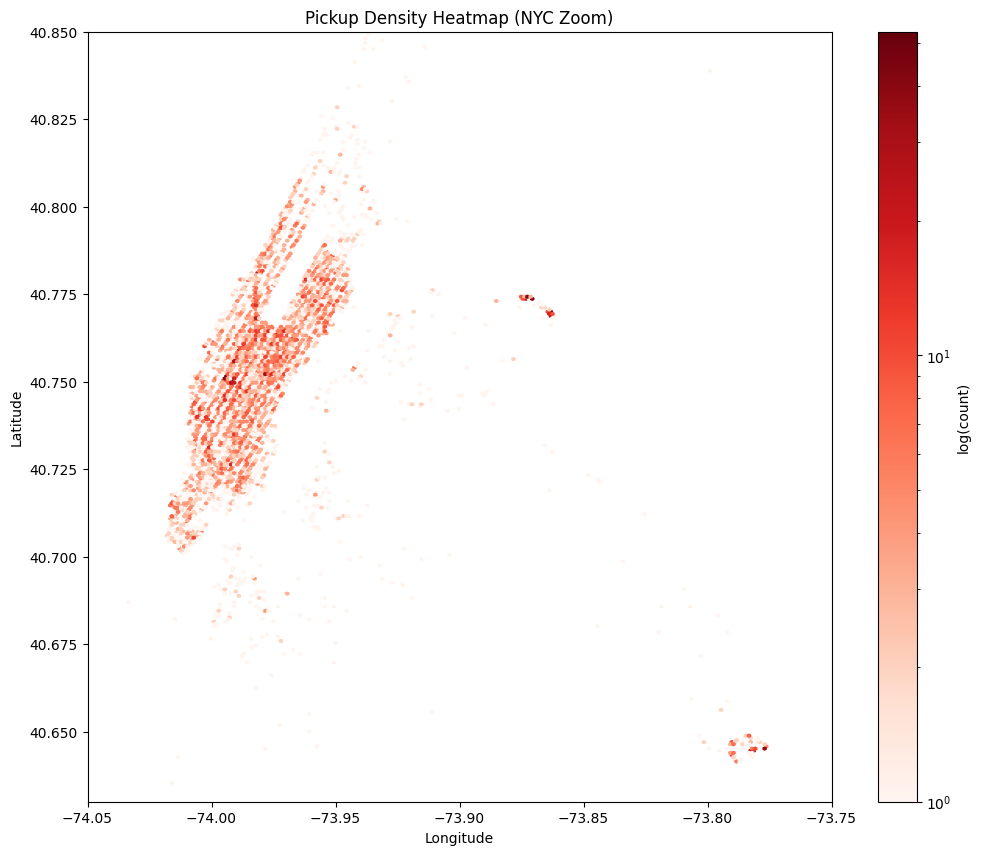

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))

hb = plt.hexbin(
    df['pickup_longitude'], df['pickup_latitude'],
    gridsize=500, cmap='Reds', bins='log', mincnt=1
)

plt.colorbar(hb, label="log(count)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Pickup Density Heatmap (NYC Zoom)")

# 🔹 NYC bounding box
plt.xlim(-74.05, -73.75)   # longitude range
plt.ylim(40.63, 40.85)     # latitude range

plt.show()


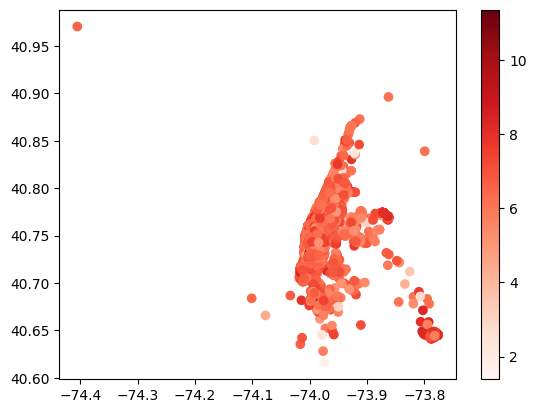

In [ ]:
plt.scatter(df["pickup_longitude"],df["pickup_latitude"],c=df["trip_duration_log"],cmap="Reds")
plt.colorbar()

In [ ]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_month,pickup_day,pickup_hour,pickup_dayofweek,euclidean_distance,trip_duration_log
count,9198.000000,9198.000000,9198.000000,9198.000000,9198.000000,9197.000000,9198.000000,9198.000000,9198.000000,9198.000000,9197.000000,9197.000000
mean,1.542292,1.655795,-73.973264,40.751212,-73.973107,40.751869,3.533159,15.543053,14.038130,3.082192,3.500351,6.475739
std,0.498235,1.302645,0.038802,0.028588,0.036900,0.032636,1.676364,8.692120,6.452235,1.938992,3.961588,0.799335
min,1.000000,0.000000,-74.405418,40.616280,-74.405418,40.582600,1.000000,1.000000,0.000000,0.000000,0.000000,1.386294
25%,1.000000,1.000000,-73.992102,40.737560,-73.991255,40.735489,2.000000,8.000000,9.450000,1.000000,1.227039,5.983936
50%,2.000000,1.000000,-73.981789,40.754374,-73.979786,40.754562,4.000000,15.000000,14.700000,3.000000,2.116438,6.501290
75%,2.000000,2.000000,-73.966982,40.768771,-73.962214,40.770260,5.000000,23.000000,19.566667,5.000000,3.953505,7.003065
max,2.000000,6.000000,-73.776337,40.970436,-73.589607,40.970436,6.000000,31.000000,23.983333,6.000000,31.680006,11.366268


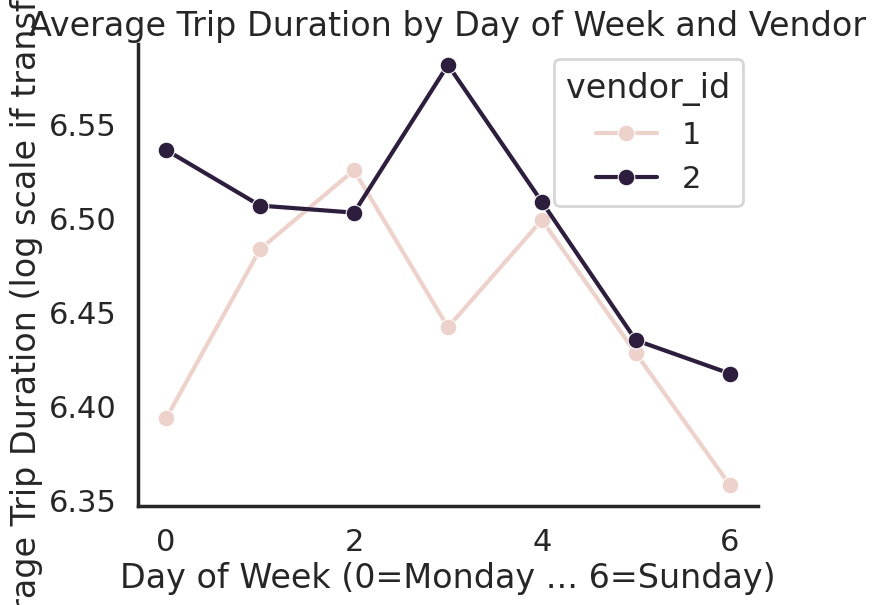

In [ ]:
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


summary_wdays_avg_duration = (
    df.groupby(['vendor_id', 'pickup_dayofweek'])['trip_duration_log']
    .mean()
    .reset_index()
)

sns.set(style="white", palette="muted", color_codes=True)
sns.set_context("poster")

plt.figure(figsize=(8,6))
sns.lineplot(
    data=summary_wdays_avg_duration,
    x="pickup_dayofweek",
    y="trip_duration_log",
    hue="vendor_id",
    marker="o"
)

plt.title("Average Trip Duration by Day of Week and Vendor")
plt.xlabel("Day of Week (0=Monday ... 6=Sunday)")
plt.ylabel("Average Trip Duration (log scale if transformed)")
sns.despine(bottom=False)

plt.show()
